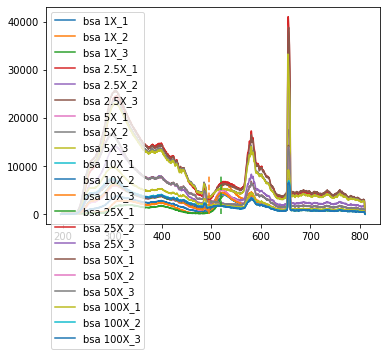

No handles with labels found to put in legend.


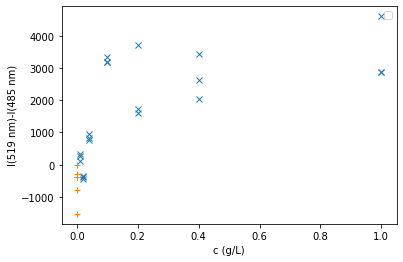

No handles with labels found to put in legend.


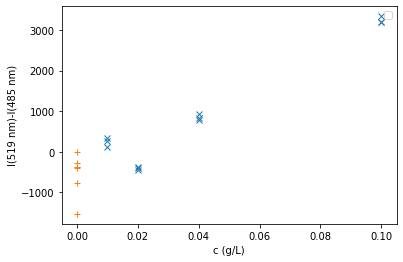

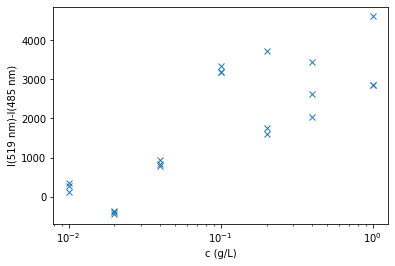

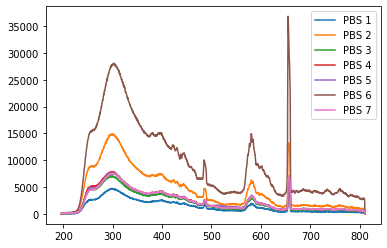

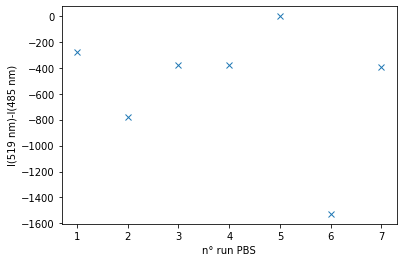

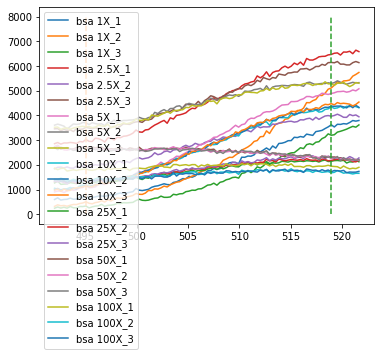

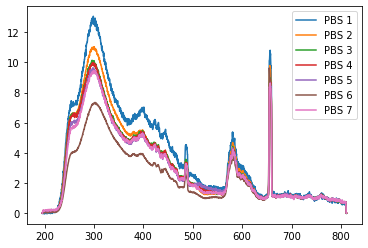

In [75]:
import numpy as np
import matplotlib.pyplot as plt 

c0=1.
dil=[1,2.5,5,10,25,50,100]
mes=[1,2,3]
bsa=[]
i=0
j=0
abs=882 #495 nm pour l'adsorption
emi=961 #519 nm pour l'emission
I519_495=np.zeros(len(dil)*len(mes))
I519_495_cor=np.zeros(len(dil)*len(mes))
I_PBS=np.zeros(len(dil))
cc=np.zeros(len(dil)*len(mes))

#definition of the zone used for calibration (should not be influenced by the solute and the fluorochrome)
bcb=1600 #700
bch=2030 

#reading of the files
for dilu in dil:
    filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/bsa/both_PBS_'+str(j+1)+'.txt'
    #replace , by . in the file
    f=open(filename,'r+')
    chaine=f.read().replace(',','.')
    f.close()
    f=open(filename,'w')
    f.write(chaine)
    f.close()
    PBS=np.genfromtxt(filename, skip_header=15)   
    I_PBS[j]=PBS[emi,1]-PBS[abs,1]
    for mesu in mes:
        filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/bsa/both_BSA_'+str(dilu)+'X_point'+str(mesu)+'.txt'
        #replace , by . in the file
        f=open(filename,'r+')
        chaine=f.read().replace(',','.')
        f.close()
        f=open(filename,'w')
        f.write(chaine)
        f.close()
        #writing in bsa
        bsa.append(np.genfromtxt(filename, skip_header=15))
        #plot of the spectra
        plt.plot(bsa[i][:,0], bsa[i][:,1], label='bsa '+str(dilu)+'X_'+str(mesu))
        cc[i]=c0/dil[j]
        #calculation of the delta of intensities
        I519_495[i]=bsa[i][emi,1]-bsa[i][abs,1]
        #calculation of the corrected delta 
        cal=np.mean(bsa[i][bcb:bch,1])
        I519_495_cor[i]=I519_495[i]*np.mean(bsa[0][bcb:bch,1])/cal
        i=i+1
    j=j+1


plt.plot([bsa[1] [abs,0],bsa[1] [abs,0]],[0,8000],'--')
plt.plot([bsa[1] [emi,0],bsa[1] [emi,0]],[0,8000],'--')
plt.legend(loc='best')
plt.show()

plt.plot(cc,I519_495,'x')
'''plt.plot(cc,I519_495_cor,'x', label='with correction')'''
plt.plot([0,0,0,0,0,0,0],I_PBS,'+')
plt.xlabel('c (g/L)')
plt.ylabel('I(519 nm)-I(485 nm)')
plt.legend(loc='best')
plt.show()

plt.plot(cc[9:21],I519_495[9:21],'x')
'''plt.plot(cc[9:21],I519_495_cor[9:21],'x', label='with correction')'''
plt.plot([0,0,0,0,0,0,0],I_PBS,'+')
plt.xlabel('c (g/L)')
plt.ylabel('I(519 nm)-I(485 nm)')
plt.legend(loc='best')
plt.show()

plt.semilogx(cc,I519_495,'x')
plt.xlabel('c (g/L)')
plt.ylabel('I(519 nm)-I(485 nm)')
plt.show()

for j in range(7):
    filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/bsa/both_PBS_'+str(j+1)+'.txt'
    PBS=np.genfromtxt(filename, skip_header=15)   
    plt.plot(bsa[j][:,0], PBS[:,1], label='PBS '+str(j+1))

plt.legend(loc='best')
plt.show()

plt.plot([1,2,3,4,5,6,7],I_PBS,'x')
plt.xlabel('n° run PBS')
plt.ylabel('I(519 nm)-I(485 nm)')
plt.show()

#plot of the zoom in the ROI
i=0
j=0
gap=10
for dilu in dil:
    for mesu in mes:
        plt.plot(bsa[i][abs-gap:emi+gap,0], bsa[i][abs-gap:emi+gap,1], label='bsa '+str(dilu)+'X_'+str(mesu))
        i=i+1
    j=j+1

plt.plot([pbs [abs,0],pbs [abs,0]],[0,8000],'--')
plt.plot([pbs [emi,0],pbs [emi,0]],[0,8000],'--')
plt.legend(loc='best')
plt.show()


#definition of the zone used for calibration (should not be influenced by the solute and the fluorochrome)
bcb=1600 #700
bch=2030 
    
#test recalibration on pbs
for j in range(7):
    filename ='C:/Users/patri/Documents/Recherche/theses/these_adriana/fluo/bsa/both_PBS_'+str(j+1)+'.txt'
    PBS=np.genfromtxt(filename, skip_header=15)   
    cal=np.mean(PBS[bcb:bch,1])   
    plt.plot(bsa[j][:,0], PBS[:,1]/cal, label='PBS '+str(j+1))

plt.legend(loc='best')
plt.show() 
    




In [73]:
print (cc)

[2.   2.   2.   0.8  0.8  0.8  0.4  0.4  0.4  0.2  0.2  0.2  0.08 0.08
 0.08 0.04 0.04 0.04 0.02 0.02 0.02]


In [35]:
print (subs)

2067


In [49]:
print (I_PBS)

[ -282.  -778.  -378.  -377.    -3. -1527.  -395.]
